In [71]:
from prophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [161]:
data = pd.read_csv("la_temperature.csv", parse_dates=["time"], index_col="time")
data.head()

,tavg
time,
2019-06-19,20.4
2019-06-20,19.7
2019-06-21,19.0
2019-06-22,19.8
2019-06-23,19.5


In [162]:
data = data.reset_index()
data['ds'] = data['time']
data['y'] = data['tavg']
cap_value = data['y'].max()
data['cap'] = cap_value

In [166]:
model = Prophet(
    growth='logistic',
    changepoint_prior_scale=0.001, 
    seasonality_mode='multiplicative',
    seasonality_prior_scale=10.0,
    changepoint_range=0.1,
    yearly_seasonality=True  
)
model.fit(data[:-200])

future = model.make_future_dataframe(periods=200)
future['cap'] = cap_value
forecast = model.predict(future)

15:23:45 - cmdstanpy - INFO - Chain [1] start processing
15:23:45 - cmdstanpy - INFO - Chain [1] done processing


Text(92.09722222222221, 0.5, 'Avg. Temperature (°C)')

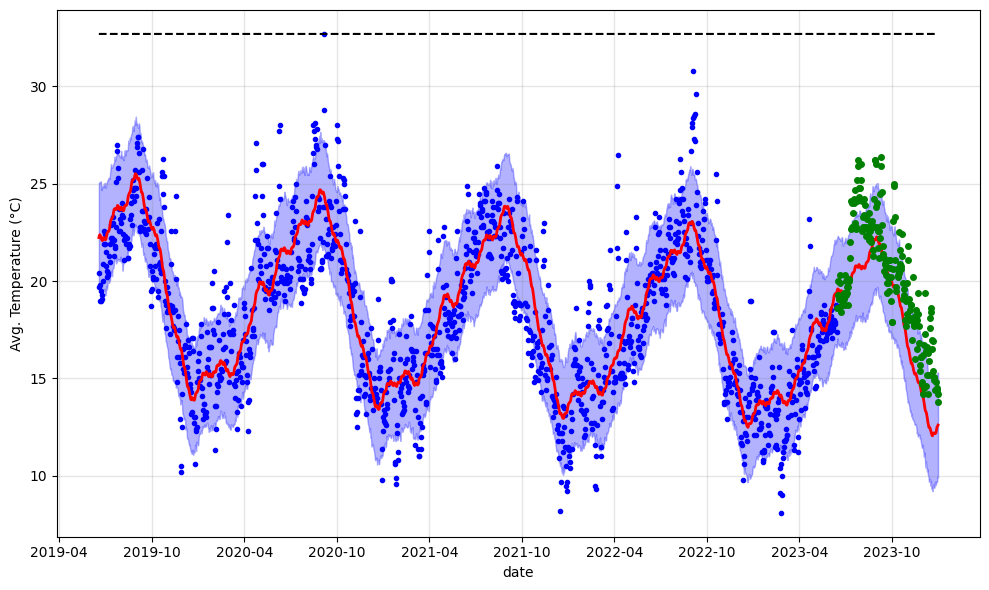

In [167]:
fig = model.plot(forecast)
ax = fig.gca()
forecast_line = ax.get_lines()[1]  # 0 is the historical, 1 is yhat
forecast_line.set_color('red')
forecast_line.set_linewidth(2.)
historical_line = ax.get_lines()[0]
historical_line.set_color('blue')
#historical_line.set_linestyle('-')
historical_line.set_linewidth(1)
for collection in ax.collections:
    collection.set_alpha(0.3)
    collection.set_facecolor('blue')
    collection.set_edgecolor('blue')
plt.plot(data["ds"][-200:], data["y"][-200:], 'o', markersize=4, color="green")
plt.xlabel("date")
plt.ylabel("Avg. Temperature (°C)")


In [168]:
rmse = np.sqrt(mean_squared_error(forecast['yhat'], data['y']))
mae = mean_absolute_error(forecast['yhat'], data['y'])

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

RMSE: 2.26
MAE: 1.74


In [101]:
import pickle

# Save the model
with open('prophet_model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('forecast.pkl', 'wb') as f:
    pickle.dump(forecast, f)